In [1]:
#Bayesian Scan test example

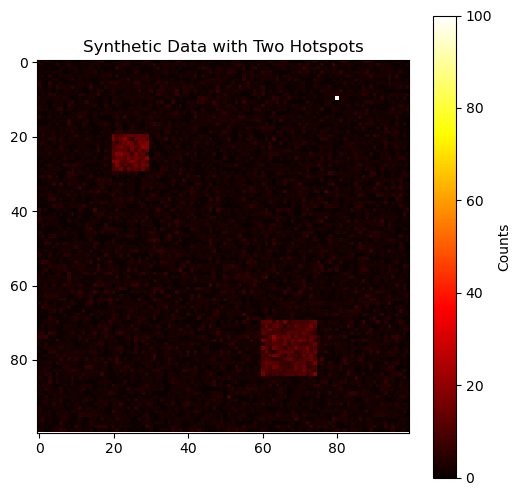

Best cluster top-left corner: (20, 20)
Bayesian score: 6808.376398058629


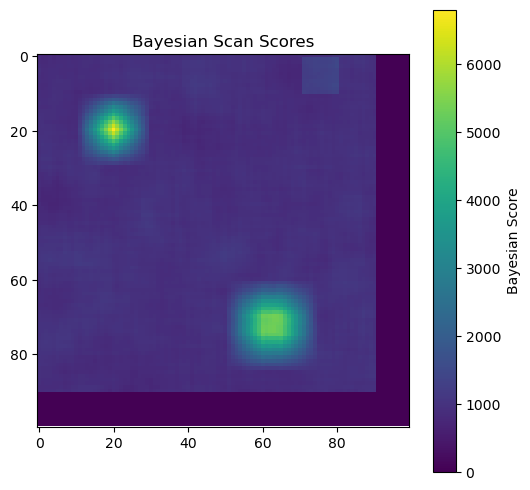

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic 100x100 data
np.random.seed(42)
grid = np.random.poisson(lam=2, size=(100, 100))  # mostly low background

# Inject hotspot 1
grid[20:30, 20:30] += np.random.poisson(lam=10, size=(10, 10))

# Inject hotspot 2
grid[70:85, 60:75] += np.random.poisson(lam=8, size=(15, 15))

# Fake hotspot 3
grid[10, 80] = 100   # extreme single-cell outlier


plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="hot", interpolation="nearest")
plt.colorbar(label="Counts")
plt.title("Synthetic Data with Two Hotspots")
plt.show()

# 2. Bayesian scan function
def bayesian_scan(grid, window_size=10, alpha=1.0, beta=1.0):
    """
    grid: 2D numpy array
    window_size: size of scanning square
    alpha, beta: prior parameters for Bayesian Poisson-Gamma model
    """
    best_score = -np.inf
    best_coords = None
    scores = np.zeros_like(grid, dtype=float)

    rows, cols = grid.shape
    for i in range(rows - window_size + 1):
        for j in range(cols - window_size + 1):
            window = grid[i:i+window_size, j:j+window_size]
            total = window.sum()
            n = window.size

            # Null model: counts ~ Poisson with global rate
            global_rate = grid.mean()
            log_like_null = total * np.log(global_rate + 1e-9) - n * global_rate

            # Alternative model: Bayesian posterior predictive (Gamma-Poisson)
            log_like_alt = (total + alpha - 1) * np.log(total + beta) - (total + beta)

            # Score = log Bayes factor
            score = log_like_alt - log_like_null
            scores[i, j] = score

            if score > best_score:
                best_score = score
                best_coords = (i, j)

    return best_coords, best_score, scores

# 3. Run Bayesian scan
best_coords, best_score, scores = bayesian_scan(grid, window_size=10)

print("Best cluster top-left corner:", best_coords)
print("Bayesian score:", best_score)

# Visualize scan scores
plt.figure(figsize=(6,6))
plt.imshow(scores, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Bayesian Score")
plt.title("Bayesian Scan Scores")
plt.show()


In [13]:
grid

array([[4, 1, 3, ..., 2, 1, 0],
       [3, 3, 1, ..., 1, 1, 3],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [2, 3, 1, ..., 2, 2, 1],
       [0, 1, 2, ..., 0, 0, 2],
       [3, 2, 0, ..., 2, 3, 1]])